In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

Filter and get only the data since 2000.

In [2]:
df = pd.read_csv("../data/billboard.csv", index_col = 0)

In [3]:
df = df[df.date >= "2000-01-01"]

In [4]:
#df.to_csv('charts_since2000.csv')

The song with highest weeks-on-board

In [4]:
df[df["weeks-on-board"]==df["weeks-on-board"].max()]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
1719,2021-09-04,20,Blinding Lights,The Weeknd,21.0,1,90


Count values for distinct artist and songs respectively

In [6]:
df["artist"].value_counts()

Taylor Swift                                1060
Drake                                        787
Kenny Chesney                                723
Keith Urban                                  673
Rascal Flatts                                604
                                            ... 
Moneybagg Yo Featuring Polo G & Lil Durk       1
Eminem Featuring P!nk                          1
Lil Jon Featuring LMFAO                        1
Khalid With John Mayer                         1
Gucci Mane & Drake                             1
Name: artist, Length: 4238, dtype: int64

In [7]:
df[["song", "artist"]].value_counts()

song                        artist                                   
Blinding Lights             The Weeknd                                   90
Radioactive                 Imagine Dragons                              87
Sail                        AWOLNATION                                   79
I'm Yours                   Jason Mraz                                   76
Party Rock Anthem           LMFAO Featuring Lauren Bennett & GoonRock    68
                                                                         ..
Breathless                  Taylor Swift                                  1
Bridge Over Troubled Water  Glee Cast                                     1
That's On Me                Mac Miller                                    1
Bridge Over Troubled Water  Tessanne Chin                                 1
Lost In Paradise            Evanescence                                   1
Length: 9316, dtype: int64

In [8]:
df.describe()

,rank,last-week,peak-rank,weeks-on-board
count,114900.000000,114900.000000,114900.000000,114900.000000
mean,50.500000,42.879521,38.931619,11.778033
std,28.866196,30.102179,28.892800,9.493426
min,1.000000,0.000000,1.000000,1.000000
25%,25.750000,16.000000,12.000000,5.000000
50%,50.500000,41.000000,36.000000,10.000000
75%,75.250000,69.000000,63.000000,17.000000
max,100.000000,100.000000,100.000000,90.000000


Drop duplicatse for repeated song and then visualise the peak-rank and weeks-on-board columns

In [6]:
df_no_dup = df.drop_duplicates(['song','artist']).drop(['rank', 'last-week'],axis = 1)

In [7]:
df_no_dup.head()

,date,song,artist,peak-rank,weeks-on-board
0,2022-01-01,All I Want For Christmas Is You,Mariah Carey,1,50
1,2022-01-01,Rockin' Around The Christmas Tree,Brenda Lee,2,44
2,2022-01-01,Jingle Bell Rock,Bobby Helms,3,41
3,2022-01-01,A Holly Jolly Christmas,Burl Ives,4,25
4,2022-01-01,Easy On Me,Adele,1,11


This Week Rank vs Last Week Rank

Text(0.5, 1.0, 'Last-week Rank vs. This-week Rank')

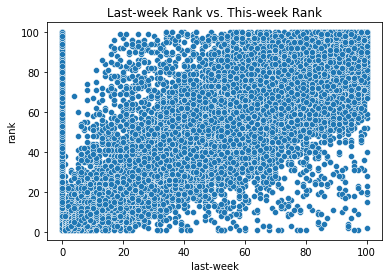

In [5]:
sns.scatterplot(x = 'last-week', y = "rank", data= df)
plt.title("Last-week Rank vs. This-week Rank")

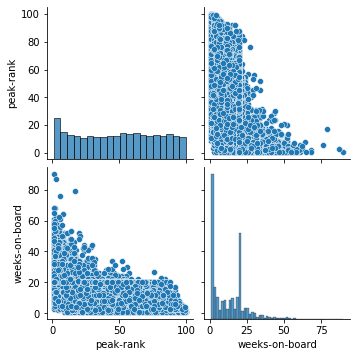

In [8]:
sns.pairplot(df_no_dup)

Get top artists and songs

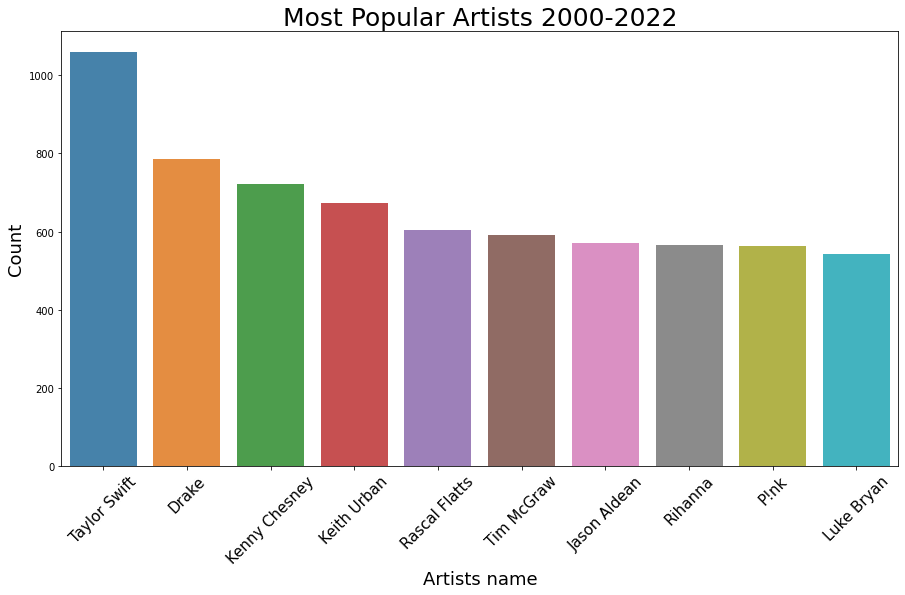

In [12]:
df_artist = df['artist'].value_counts().head(10)
df_artist = df_artist[:10,] # for the first ten artists
plt.figure(figsize=(15,8)) # figsize: inch by inch
sns.barplot(x = df_artist.index, y = df_artist.values, alpha=0.9)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Artists name', fontsize=18)
plt.title('Most Popular Artists 2000-2022', fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

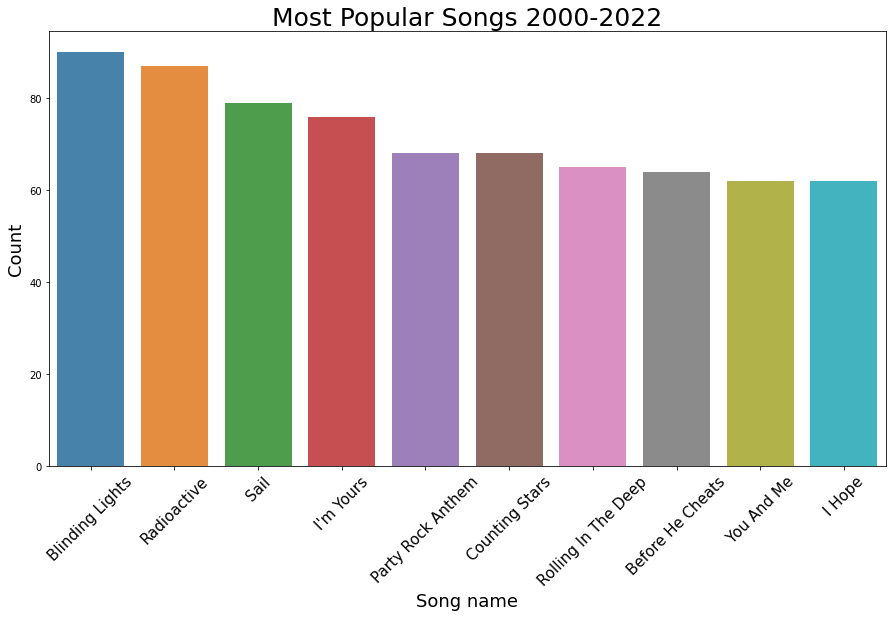

In [13]:
df_song = df[['song','artist']].value_counts().head(10)
df_song = df_song[:10,] # for the first ten artists
index = pd.Series(list(df_song.index)).apply(lambda x: x[0])
# index[4] = 'Party Rock Anthem - LMFAO, Lauren Bennett & GoonRock'
plt.figure(figsize=(15,8)) # figsize: inch by inch
sns.barplot(x = index, y = df_song.values, alpha=0.9)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Song name', fontsize=18)
plt.title('Most Popular Songs 2000-2022', fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

WordCloud

In [11]:
song_names = " ".join(list(df.song.values))

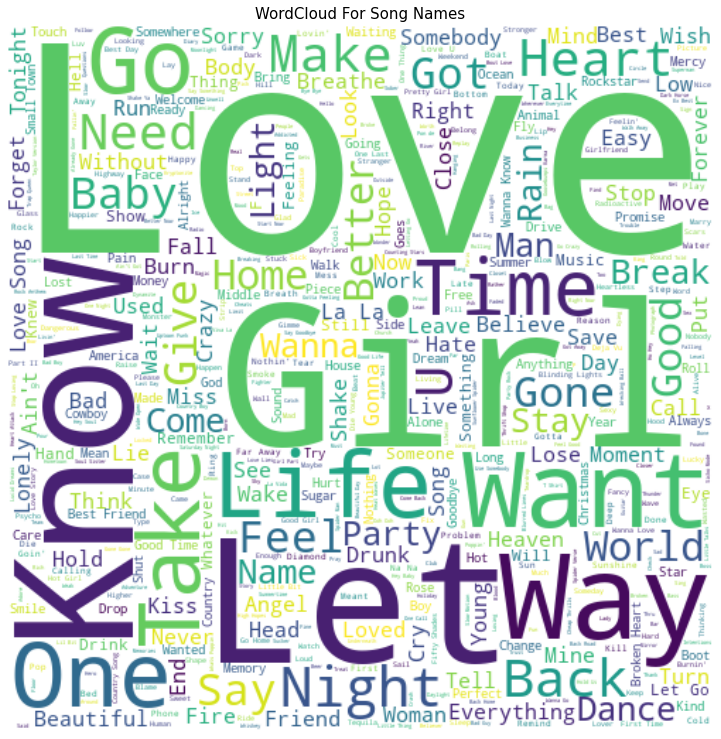

In [12]:
from wordcloud import STOPWORDS
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(song_names)
plt.figure(figsize=(13,13))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud For Song Names", fontsize=15)
plt.show()

We generate wordCloud for song names in a lovely heart shape

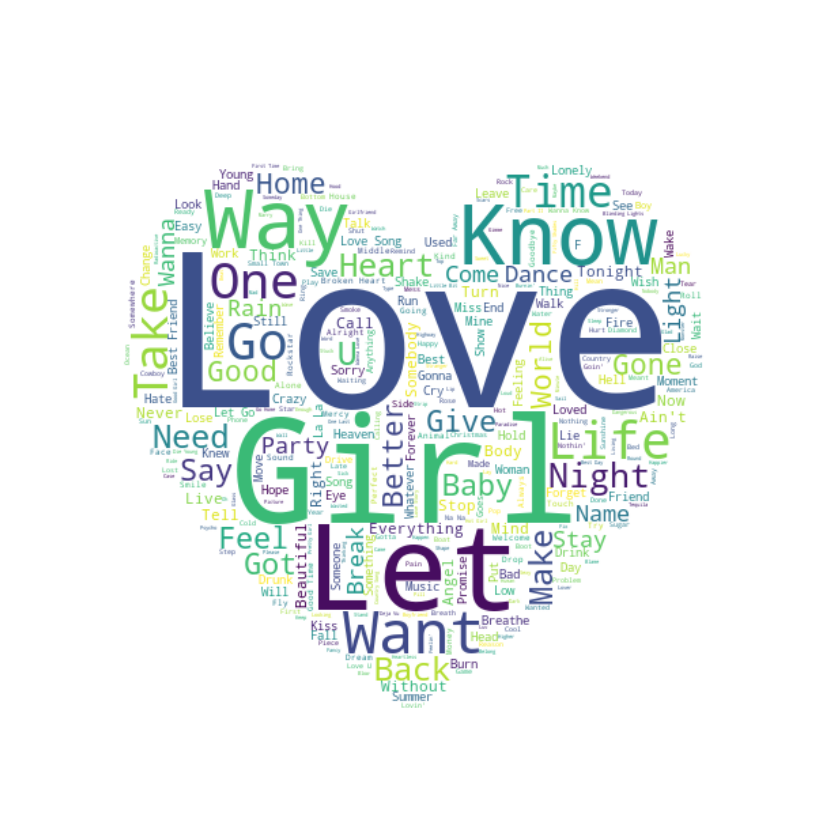

In [13]:
mask = np.array(Image.open('heart.jpeg'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=~mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(song_names)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.title("WordCloud For Song Names", fontsize=15)
plt.show()